In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import joblib

In [2]:
df=pd.read_csv("Desktop/breast.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df=df.drop('id',axis=1)

In [5]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df=df.rename(columns={'diagnosis':'tani','radius_mean':'yaricap_ortalamsi','texture_mean':'doku_ortalamasi','perimeter_mean':'cevre_ortlaması','area_mean':'alan_ortalaması',
                     'smoothness_mean':'puruzsuzluk_ortlamasi','compactness_mean':'kompaktlik_ortalamasi','concavity_mean':'icbukeylik_Ortalamasi','concave_points_mean':'icbukey_noktalar_ortalamasi',
                     'symmetry_mean':'simetri_ortalamasi','fractal_dimension_mean':'fraktal_boy_ortalamsi','radius_se':'yaricap_se','texture_se':'doku_se',
                     'perimeter_se':'cevre_se','area_se':'alan_se','smoothness_se':'puruzsuzluk_se','compactness_se':'kompaklık_se','concavity_se':'icbukeylik_se','concave_points_se':'icbukey_noktalar_se',
                     'symmetry_se':'simetri_se','fractal_dimension_se':'fraktal_boyut_se','radius_worst':'yaricap_en_kotu','texture_worst':'doku_en_kotu',
                     'perimeter_worst':'cevre_en_kotu','area_worst':'alan_en_kotu','smoothness_worst':'puruzsuzluk_en_kotusu','compactness_worst':'kompakt_en_kotusu','concavity_worst':'icbukey_en_kotusu',
                     'concave_points_worst':'icbukey_noktalar_en_kotusu','symmetry_worst':'simetri_en_kotusu','fractal_dimension_worst':'fraktal_boy_en_kotusu'})

In [8]:
df

,tani,yaricap_ortalamsi,doku_ortalamasi,cevre_ortlaması,alan_ortalaması,puruzsuzluk_ortlamasi,kompaktlik_ortalamasi,icbukeylik_Ortalamasi,icbukey_noktalar_ortalamasi,simetri_ortalamasi,fraktal_boy_ortalamsi,yaricap_se,doku_se,cevre_se,alan_se,puruzsuzluk_se,kompaklık_se,icbukeylik_se,icbukey_noktalar_se,simetri_se,fraktal_boyut_se,yaricap_en_kotu,doku_en_kotu,cevre_en_kotu,alan_en_kotu,puruzsuzluk_en_kotusu,kompakt_en_kotusu,icbukey_en_kotusu,icbukey_noktalar_en_kotusu,simetri_en_kotusu,fraktal_boy_en_kotusu
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tani,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yaricap_ortalamsi,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
doku_ortalamasi,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
cevre_ortlaması,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
alan_ortalaması,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
puruzsuzluk_ortlamasi,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
kompaktlik_ortalamasi,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
icbukeylik_Ortalamasi,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
icbukey_noktalar_ortalamasi,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012
simetri_ortalamasi,569.0,NaN,NaN,NaN,0.181162,0.027414,0.106,0.1619,0.1792,0.1957,0.304


In [10]:
df.isnull().sum()

tani                           0
yaricap_ortalamsi              0
doku_ortalamasi                0
cevre_ortlaması                0
alan_ortalaması                0
puruzsuzluk_ortlamasi          0
kompaktlik_ortalamasi          0
icbukeylik_Ortalamasi          0
icbukey_noktalar_ortalamasi    0
simetri_ortalamasi             0
fraktal_boy_ortalamsi          0
yaricap_se                     0
doku_se                        0
cevre_se                       0
alan_se                        0
puruzsuzluk_se                 0
kompaklık_se                   0
icbukeylik_se                  0
icbukey_noktalar_se            0
simetri_se                     0
fraktal_boyut_se               0
yaricap_en_kotu                0
doku_en_kotu                   0
cevre_en_kotu                  0
alan_en_kotu                   0
puruzsuzluk_en_kotusu          0
kompakt_en_kotusu              0
icbukey_en_kotusu              0
icbukey_noktalar_en_kotusu     0
simetri_en_kotusu              0
fraktal_bo

In [11]:
df.duplicated().sum()

0

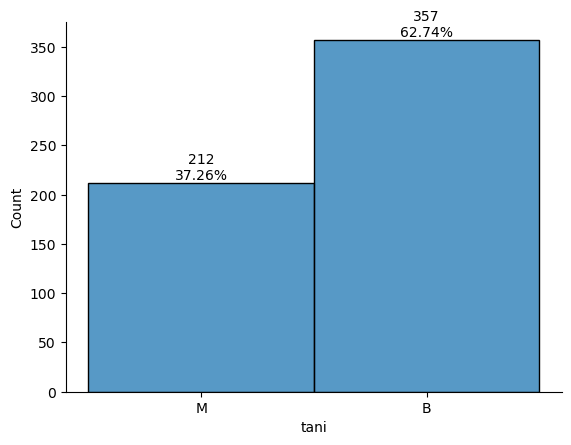

In [12]:
sns.histplot(data=df, x='tani')
for i, bar in enumerate(plt.gca().patches):
    counts = bar.get_height()
    percent = f'{round(counts / df.shape[0] * 100, 2)}%'
    text = f'{counts}\n{percent}'
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')
sns.despine()

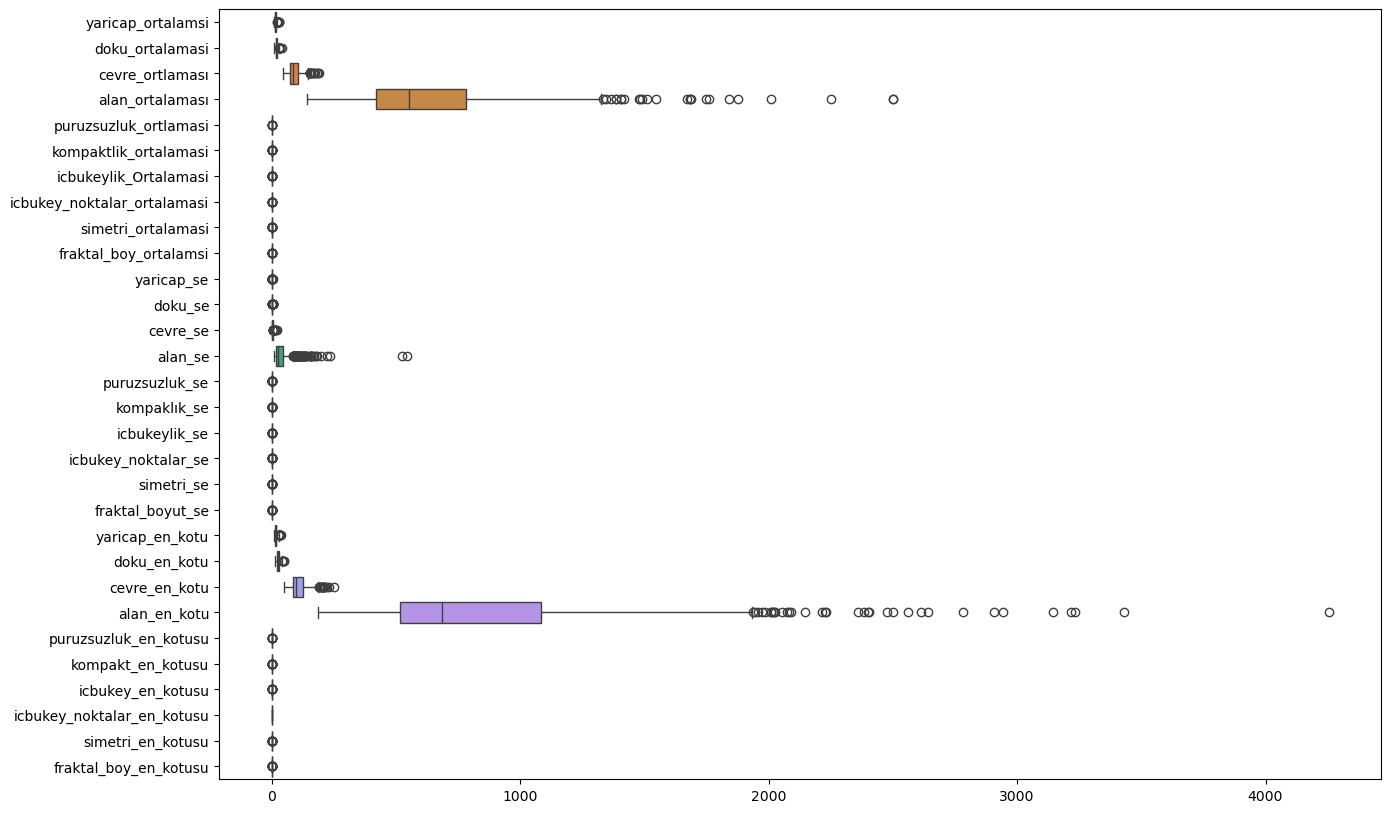

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient = 'h')
plt.show()

In [14]:
# sayısal değerleri standartizasyon
scaler = StandardScaler().set_output(transform='pandas')
df_num = df.drop(columns = 'tani').copy()
df_num = scaler.fit_transform(df_num)

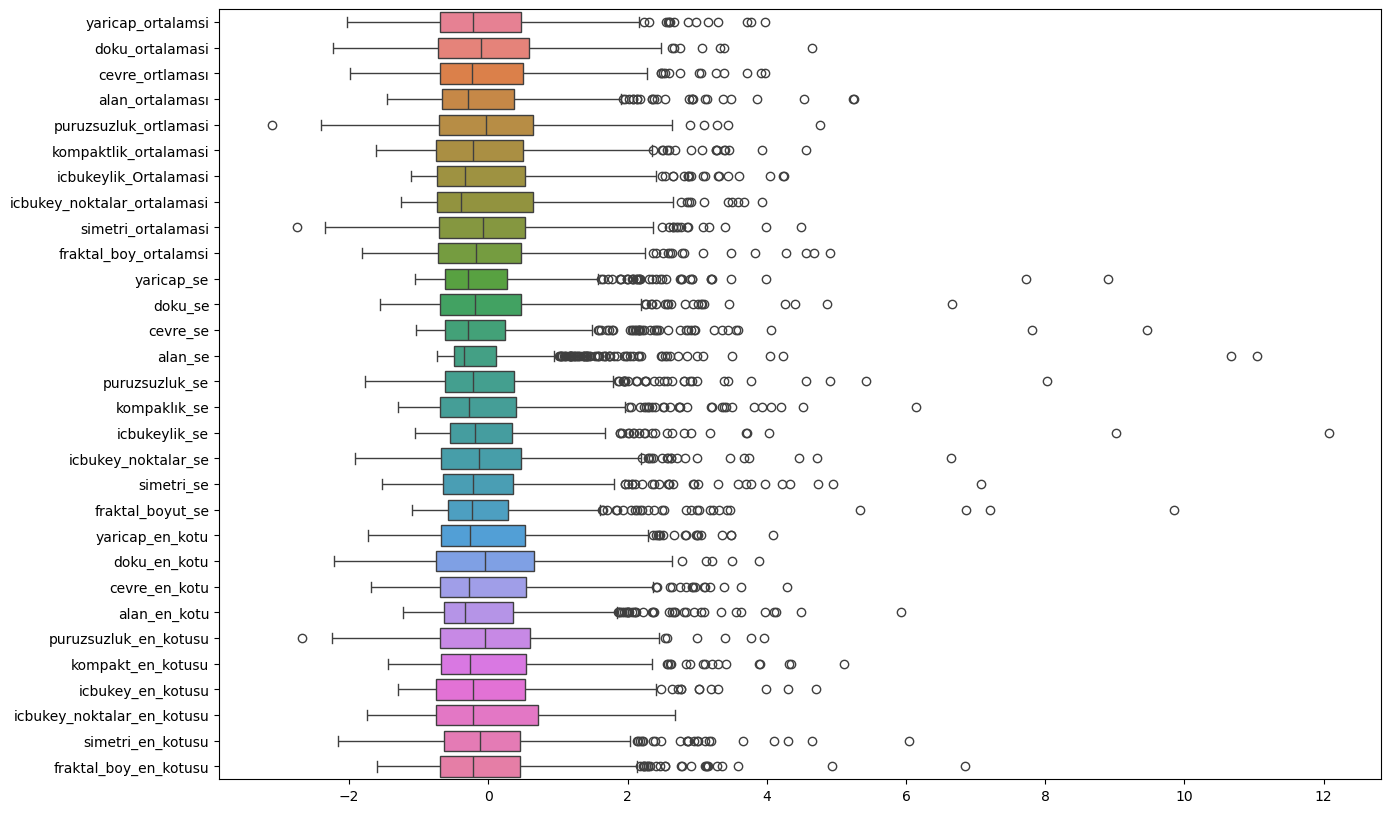

In [15]:
# Sayısal değerleri tekrar görelim
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_num, orient = 'h')
plt.show()

In [16]:
# Encoding the target
df['tani'] = df['tani'].map({'B': 0, 'M': 1})

In [17]:
X = df_num.copy()
y = df[['tani']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)

LOGISTIC REGRESYON MODELİ

In [18]:
logreg = LogisticRegression(random_state=42).fit(X_train, y_train)

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
logreg_y_pred = logreg.predict(X_test)

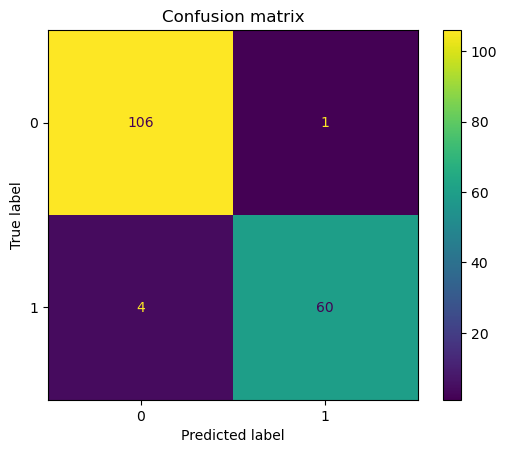

In [20]:
log_cm = confusion_matrix(y_test, logreg_y_pred, labels=logreg.classes_)

# Karışıklık matrisinin görüntüsünü oluştur
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=logreg.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')
plt.title("Confusion matrix")

# plot olarak görüntüleme
plt.show()

In [21]:
# Create classification report for logistic regression model
target_names = ['Predicted Benign', 'Predicted Maglinant']
print(classification_report(y_test, logreg_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.96      0.99      0.98       107
Predicted Maglinant       0.98      0.94      0.96        64

           accuracy                           0.97       171
          macro avg       0.97      0.96      0.97       171
       weighted avg       0.97      0.97      0.97       171



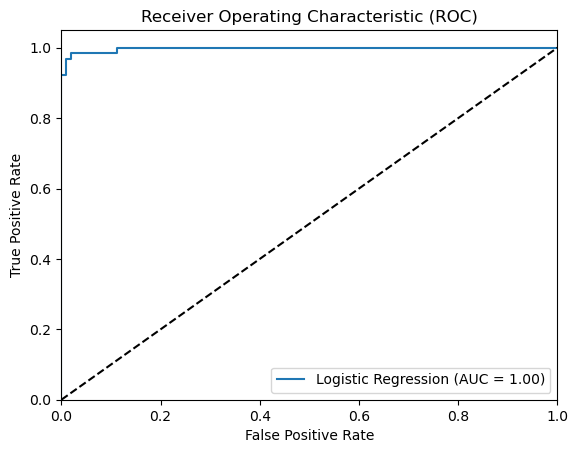

In [22]:
# AUC: Modelin tahmin başarısını özetler ve değerinin 1'e yakın olması, modelin iyi performans gösterdiği anlamına gelir.
# ROC Eğresi ne kadar çok alan kaplıyorsa o kadar iyidir

#  logistij regresyon için ROC and AUC hesapla
log_probs = logreg.predict_proba(X_test)[:, 1]
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
log_auc = roc_auc_score(y_test, log_probs)

# Plot ROC and AUC for logistic regression
plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = %0.2f)' % log_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [23]:
#Modeller arasında karşılaştırma yapmak için tüm önem metriklerini birleştiren bir fonksiyon tanımlayın
def get_test_scores(model_name:str, preds, y_test_data, auc):
    table = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'AUC'])
    table.loc[0] = {
        'Model': model_name,
        'Precision': precision_score(y_test_data, preds),
        'Recall': recall_score(y_test_data, preds),
        'F1 Score': f1_score(y_test_data, preds),
        'Accuracy': accuracy_score(y_test_data, preds),
        'AUC': auc
    }
    return table

In [24]:
logreg_test_scores = get_test_scores('LogRegression', logreg_y_pred, y_test, log_auc)
logreg_test_scores

,Model,Precision,Recall,F1 Score,Accuracy,AUC
0,LogRegression,0.983607,0.9375,0.96,0.97076,0.997518


DECISION TREE MODELI

In [25]:
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [26]:
dt_y_pred = dt_model.predict(X_test)

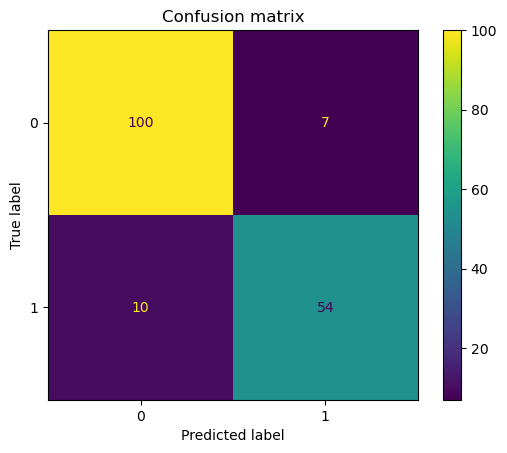

In [27]:
dt_cm = confusion_matrix(y_test, dt_y_pred, labels=dt_model.classes_)

#  confusion matrix
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                                  display_labels=dt_model.classes_)

# Plot confusion matrix
dt_disp.plot(values_format='')
plt.title("Confusion matrix")
plt.show()

In [28]:
print(classification_report(y_test, dt_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.91      0.93      0.92       107
Predicted Maglinant       0.89      0.84      0.86        64

           accuracy                           0.90       171
          macro avg       0.90      0.89      0.89       171
       weighted avg       0.90      0.90      0.90       171



In [29]:
dt_probs = dt_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)


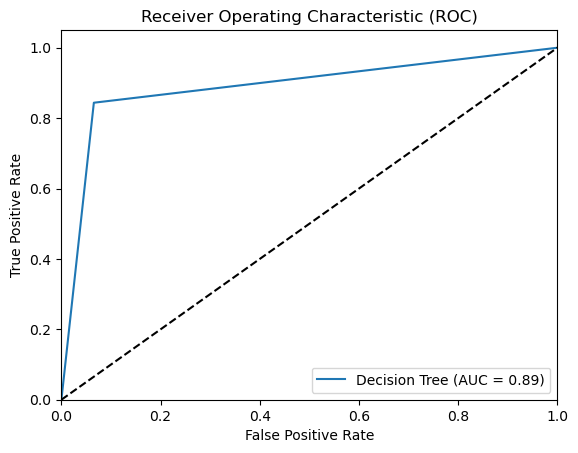

In [30]:
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [31]:
dt_test_scores = get_test_scores('DecisionTree', dt_y_pred, y_test, dt_auc)
dt_test_scores

,Model,Precision,Recall,F1 Score,Accuracy,AUC
0,DecisionTree,0.885246,0.84375,0.864,0.900585,0.889165


SVC MODELİ

In [32]:
svc_model = SVC(probability=True).fit(X_train, y_train)

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
svc_y_pred = svc_model.predict(X_test)

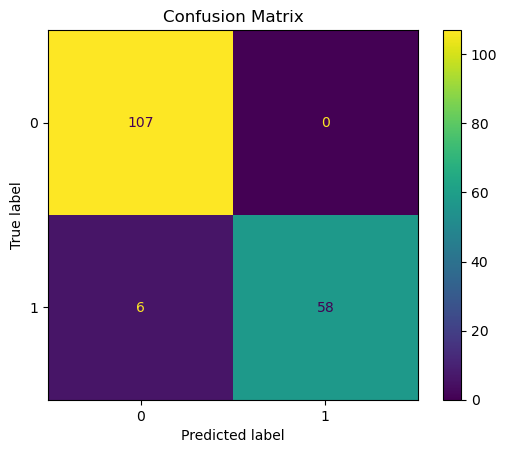

In [34]:
# Compute values for confusion matrix
svc_cm = confusion_matrix(y_test, svc_y_pred, labels=svc_model.classes_)

# Create display of confusion matrix
svc_disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm,
                                  display_labels=svc_model.classes_)

# Plot confusion matrix
svc_disp.plot(values_format='')

# Display plot
plt.title("Confusion Matrix")
plt.show()

In [35]:
print(classification_report(y_test, svc_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.95      1.00      0.97       107
Predicted Maglinant       1.00      0.91      0.95        64

           accuracy                           0.96       171
          macro avg       0.97      0.95      0.96       171
       weighted avg       0.97      0.96      0.96       171



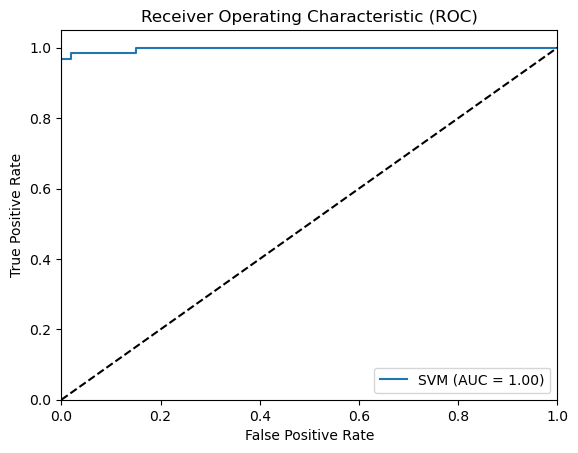

In [36]:
# Calculate ROC and AUC for SVC
svc_probs = svc_model.predict_proba(X_test)[:, 1]
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
svc_auc = roc_auc_score(y_test, svc_probs)

# Plot ROC and AUC for SVC
plt.plot(svc_fpr, svc_tpr, label='SVM (AUC = %0.2f)' % svc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [37]:
svc_test_scores = get_test_scores('SVC', svc_y_pred, y_test, svc_auc)
svc_test_scores

,Model,Precision,Recall,F1 Score,Accuracy,AUC
0,SVC,1.0,0.90625,0.95082,0.964912,0.997371


RANDOMFOREST CLASSİFİER MODELİ

In [38]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [39]:
rf_model.score(X_test,y_test)

0.9649122807017544

Modelimi Arayüz İçin Kaydediyorum

In [40]:
rf_model = joblib.load("random_forest_model.plk")

In [41]:
rf_y_pred = rf_model.predict(X_test)

In [42]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


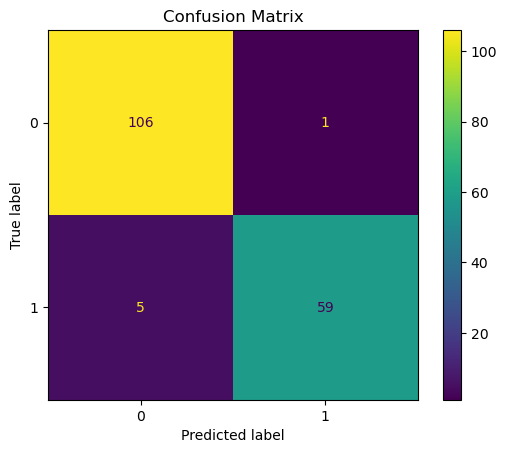

In [43]:
# Compute values for confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred, labels=rf_model.classes_)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                                  display_labels=rf_model.classes_)

# Plot confusion matrix
rf_disp.plot(values_format='')

# Display plot
plt.title("Confusion Matrix")
plt.show()

In [44]:
print(classification_report(y_test, rf_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.95      0.99      0.97       107
Predicted Maglinant       0.98      0.92      0.95        64

           accuracy                           0.96       171
          macro avg       0.97      0.96      0.96       171
       weighted avg       0.97      0.96      0.96       171



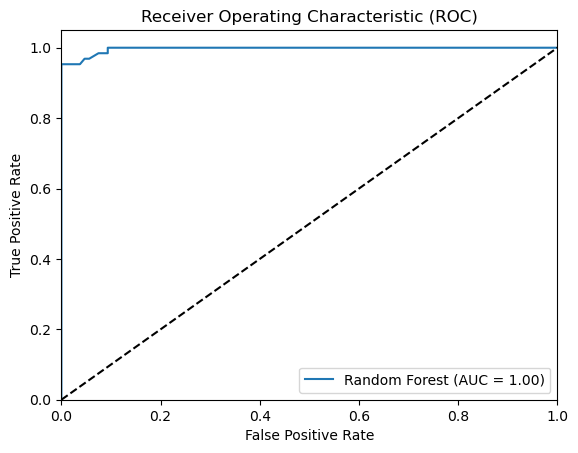

In [45]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC and AUC for Random Forest
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [46]:
rf_test_scores = get_test_scores('Random Forest', rf_y_pred, y_test, rf_auc)
rf_test_scores

,Model,Precision,Recall,F1 Score,Accuracy,AUC
0,Random Forest,0.983333,0.921875,0.951613,0.964912,0.99686


In [47]:
# Use stacking ensemble method to combine all models
estimators = [
    ('logisticRegression', logreg),
    ('decisionTree', dt_model),
    ('svm', svc_model),
    
    ('randomForest', rf_model)
]

stacking = StackingClassifier(estimators=estimators)
stacking.fit(X_train, y_train)

stacking_y_pred = stacking.predict(X_test)

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [48]:
final_test_scores = pd.concat([logreg_test_scores, dt_test_scores, svc_test_scores,  rf_test_scores])
final_test_scores.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

,Model,Precision,Recall,F1 Score,Accuracy,AUC
0,LogRegression,0.983607,0.937500,0.960000,0.970760,0.997518
1,Random Forest,0.983333,0.921875,0.951613,0.964912,0.996860
2,SVC,1.000000,0.906250,0.950820,0.964912,0.997371
3,DecisionTree,0.885246,0.843750,0.864000,0.900585,0.889165


In [ ]:
#Precision: Modelin tahmin ettiği pozitif sınıfların ne kadarının doğru olduğunu gösterir.
#Recall: Gerçek pozitif sınıfların ne kadarının doğru tahmin edildiğini gösterir.
#F1 Score: Precision ve recall'un harmonik ortalamasıdır.
#Accuracy: Doğru tahminlerin tüm tahminlere oranıdır.
#AUC: ROC eğrisinin altındaki alanı ölçer, modelin genel başarısını özetler.
